
# Breast Cancer Prediction Using Machine Learning

Project Overview:
In this project, I aim to develop a machine learning model that predicts whether a breast tumor is
malignant or benign based on various features derived from digitized images of breast cancer biopsies.
The dataset utilized for this analysis is the Breast Cancer Wisconsin dataset, which is widely recognized
in the field of medical machine learning.

Dataset:
The dataset contains 30 features that describe characteristics of the cell nuclei present in the images.
These features include metrics such as radius, texture, perimeter, and area of the tumors. The target
variable indicates the tumor classification: malignant (1) or benign (0).

Methodology:
1. **Data Loading**: I will load the dataset from the scikit-learn library, which provides easy access
   to this benchmark dataset.
2. **Data Exploration**: A comprehensive analysis of the dataset will be conducted to understand the
   structure, feature distributions, and class balance.
3. **Data Preprocessing**: The dataset will be split into training and testing sets. I will standardize
   the feature values to improve model performance.
4. **Model Development**: I will employ a Random Forest Classifier, a robust algorithm known for its
   effectiveness in classification tasks, particularly in healthcare applications.
5. **Model Evaluation**: The model's performance will be evaluated using metrics such as accuracy,
   precision, recall, and the ROC AUC score.
6. **Feature Importance Analysis**: I will utilize SHAP (SHapley Additive exPlanations) to gain insights
   into which features contribute most significantly to the model's predictions.
7. **User Interaction**: A user-friendly interface will be developed that allows users to input the
   required features (such as radius, texture, perimeter, etc.) related to a breast tumor. Once the
   features are provided, the model will predict whether the tumor is benign or malignant, facilitating
   informed decision-making.

This project aims to enhance understanding of machine learning applications in healthcare and provide a
valuable tool for assisting in clinical decision-making regarding breast cancer diagnosis.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap
from sklearn.datasets import load_breast_cancer


In [ ]:
# Import Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [ ]:
# Overview of Data
print("Dataset Overview:")
print(df.head())
print("\nClass Distribution:")
print(df['target'].value_counts())

Dataset Overview:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area

In [ ]:
# Split Data (Training and Testing)
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make Predictions
y_pred = clf.predict(X_test_scaled)

# Step 7: Evaluate the Model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test_scaled)[:, 1]))



Confusion Matrix:
[[40  3]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


ROC AUC Score: 0.995250573206682


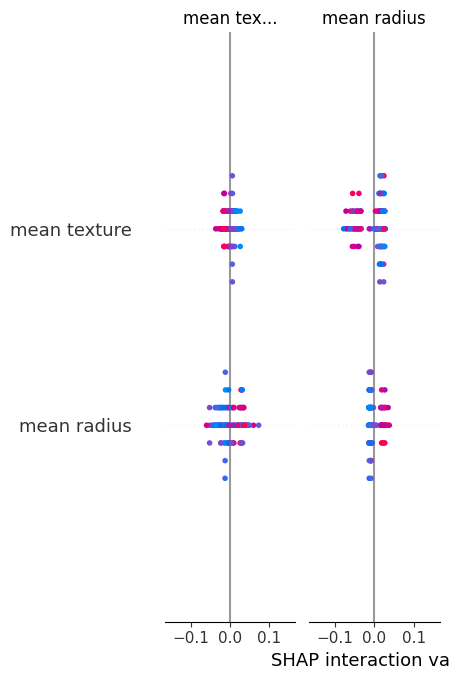

In [ ]:
# SHAP Analysis for Feature Importance
explainer = shap.Explainer(clf, X_train_scaled)
shap_values = explainer(X_test_scaled)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

In [ ]:
# Function to predict cancer type based on user input
def predict_cancer(input_features):
    # Scale the input features
    input_scaled = scaler.transform([input_features])

    # Make prediction
    prediction = clf.predict(input_scaled)

    return "Malignant" if prediction[0] == 1 else "Benign"

In [ ]:
# User Input for Prediction
def cancer_prediction_interface():
    print("Enter the features for prediction:")
    input_features = []

    for feature in data.feature_names:
        while True:
            try:
                value = float(input(f"{feature}: "))
                input_features.append(value)
                break  # Exit the loop if the input is valid
            except ValueError:
                print("Please enter a valid number.")
   # Get prediction
    result = predict_cancer(input_features)
    print(f"The prediction is: {result}")

In [ ]:
# Run the prediction interface
if __name__ == "__main__":
    cancer_prediction_interface()

Enter the features for prediction:
mean radius: 14
mean texture: 13
mean perimeter: 85
mean area: 600
mean smoothness: 0.12
mean compactness: 0.21
mean concavity: 0.31
mean concave points: 0.3
mean symmetry: 0.2
mean fractal dimension: 0.5
radius error: 1
texture error: 1
perimeter error: 1
area error: 10
smoothness error: 0.01
compactness error: 0.02
concavity error: 0.03
concave points error: 0.02
symmetry error: 0.01
fractal dimension error: 0.01
worst radius: 20
worst texture: 25
worst perimeter: 100
worst area: 800
worst smoothness: 0.1
worst compactness: 0.1
worst concavity: 0.3
worst concave points: 0.3
worst symmetry: 0.07
worst fractal dimension: 0.07
The prediction is: Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
